In [25]:
# Import the necessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [26]:
# Storing Images and their labels into lists
data = []
labels = []
classes = 43
dir = os.getcwd()

for i in range(classes):
    path = os.path.join(dir, 'train', str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error Loading Image!!")

# convert the list data to numpy arrays to feed the model
data = np.array(data)
labels = np.array(labels)

In [27]:
# Splitting the data into Train & Test Sets
print(data.shape, labels.shape)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [28]:
# Building a CNN Model to classify the images into their respective categories

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
# Training the model
epochs = 15
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
491/491 [==============================] - 59s 119ms/step - loss: 1.8132 - accuracy: 0.5519 - val_loss: 0.3378 - val_accuracy: 0.9193
Epoch 2/15
491/491 [==============================] - 60s 123ms/step - loss: 0.4594 - accuracy: 0.8731 - val_loss: 0.1414 - val_accuracy: 0.9667
Epoch 3/15
491/491 [==============================] - 64s 130ms/step - loss: 0.2767 - accuracy: 0.9235 - val_loss: 0.0805 - val_accuracy: 0.9790
Epoch 4/15
491/491 [==============================] - 63s 128ms/step - loss: 0.2207 - accuracy: 0.9401 - val_loss: 0.0588 - val_accuracy: 0.9861
Epoch 5/15
491/491 [==============================] - 67s 136ms/step - loss: 0.1827 - accuracy: 0.9506 - val_loss: 0.0565 - val_accuracy: 0.9857
Epoch 6/15
491/491 [==============================] - 64s 131ms/step - loss: 0.1539 - accuracy: 0.9571 - val_loss: 0.0502 - val_accuracy: 0.9892
Epoch 7/15
491/491 [==============================] - 64s 130ms/step - loss: 0.1404 - accuracy: 0.9629 - val_loss: 0.0476 - val_ac

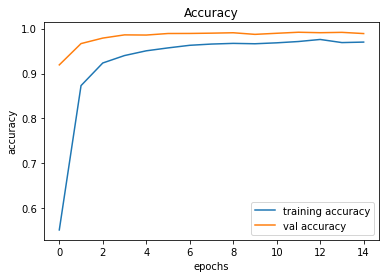

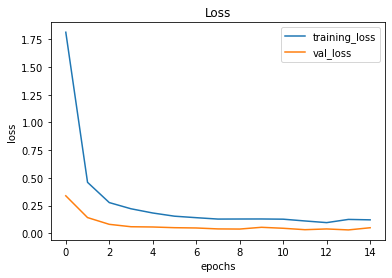

In [30]:
# Visualizing the Training results - Accuracy & Loss
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [32]:
# Testing the model with the test dataset

from sklearn.metrics import accuracy_score
import pandas as pd

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
images = y_test["Path"].values

data = []

for im in images:
    image = Image.open(im)
    image = image.resize((30, 30))
    data.append(np.array(image))
    
X_test = np.array(data)

pred = model.predict(X_test)
pred1 = np.argmax(pred,axis=1)
# Accuracy of Test Data
accuracy_score(labels, pred1)

0.9558986539984164

In [33]:
# Save the model
model.save('traffic-sign-classifier.h5')